# Adaptive Gradient

Adaptive gradient method is an iterative optimization method and it could be considered as an updated version of gradient descent. Adaptive gradient, or simply Adagrad, actively reduces the initial learning rate according to cumulative gradient value for every single parameter. Suppose having n parameters:

$\theta_{t+1,i} = \theta_{t,i} - \dfrac{\eta}{\sqrt{\epsilon I + diag(G_{t,i})}}g_{t,i}$

where $i = 0,1,\dots,n$ and $\theta_{t,i}$ is $i^{th}$ parameter at time $t$. Gradient of $\theta_{t,i}$ is $g_{t,i}$ and the the term $G_{t,i}$ is defined as

$G_{t,i} = \sum^{t}_{\tau = 0}g_{\tau}g^{T}_{\tau}$

being the sum of the squared gradient up to time step $t$. Explicitly writing above equations in matrix form gives

$\begin{bmatrix} \theta_{t+1,0} \\ \theta_{t+1,1} \\ \vdots \\ \theta_{t+1,1} \end{bmatrix}$  = $\begin{bmatrix} \theta_{t,0} \\ \theta_{t,1} \\ \vdots \\ \theta_{t,1} \end{bmatrix}$ - $\eta \Bigg( \begin{bmatrix} \epsilon & 0 & \dots & 0 \\ 0 & \epsilon & \dots & 0 \\ 0 & 0 & \dots & 0 \\ 0 & \dots & 0 & \epsilon \end{bmatrix} + \begin{bmatrix} G_{t,0} & 0 & \dots & 0 \\ 0 & G_{t,1} & \dots & 0 \\ 0 & 0 & \dots & 0 \\ 0 & \dots & 0 & G_{t,n} \end{bmatrix} \Bigg)^{-\dfrac{1}{2}}$ $\begin{bmatrix} g_{t,0} \\ g_{t,1} \\ \vdots \\ g_{t,n} \end{bmatrix}$

take a few steps further

$\begin{bmatrix} \theta_{t+1,0} \\ \theta_{t+1,1} \\ \vdots \\ \theta_{t+1,1} \end{bmatrix}$  = $\begin{bmatrix} \theta_{t,0} \\ \theta_{t,1} \\ \vdots \\ \theta_{t,1} \end{bmatrix}$ - $\begin{bmatrix}\dfrac{\eta}{\sqrt{\epsilon + \sum^{t}_{\tau = 0}g_{\tau,0}^2}} & 0 & \dots & 0 \\ 0 & \dfrac{\eta}{\sqrt{\epsilon + \sum^{t}_{\tau = 0}g_{\tau,1}^2}} & \dots & 0 \\ 0 & 0 & \dots & 0 \\ 0 & \dots & 0 & \dfrac{\eta}{\sqrt{\epsilon + \sum^{t}_{\tau = 0}g_{\tau,n}^2}} \end{bmatrix}$ $\begin{bmatrix} g_{t,0} \\ g_{t,1} \\ \vdots \\ g_{t,n} \end{bmatrix}$

and finally

$\begin{bmatrix} \theta_{t+1,0} \\ \theta_{t+1,1} \\ \vdots \\ \theta_{t+1,1} \end{bmatrix}$  = $\begin{bmatrix} \theta_{t,0} \\ \theta_{t,1} \\ \vdots \\ \theta_{t,1} \end{bmatrix}$ - $\begin{bmatrix}\dfrac{\eta}{\sqrt{\epsilon + G_{t,0}}}g_{t,0} \\ \dfrac{\eta}{\sqrt{\epsilon + G_{t,1}}}g_{t,1}\\ \vdots \\ \dfrac{\eta}{\sqrt{\epsilon + G_{t,n}}}g_{t,n} \end{bmatrix}$

For each parameter one could iterate

$\theta_{t+1,i} = \theta_{t,i} - \dfrac{\eta g_{t,i}}{\sqrt{\epsilon + \sum^{t}_{\tau = 0}g_{\tau}^2}}$

total $k * m$ times where $k$ equals the number of samples and $m$ being the number of *epochs* which is a hyperparameter. For number of epochs, one could also use additional criteria for stopping.

*The interpretation of the Adagrad is that it will lose velocity gradually and take smaller steps. This behavior lets users to start with greater values of learning rate ($\eta$) since it will get smaller as we propagate through the inverse direction of gradient. Also the update step sizes will be different on each parameter.*

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
learning_rate = 0.005
eps = 1e-6
max_iter = 1000

In [3]:
def predictor(x,a,b,c,d):
    """Main model for regression task."""
    return a*x**3 + b*x**2 + c*x + d

def f(y_true,y_pred):
    """Loss function."""
    return np.sum((y_true-y_pred)**2)

# Partial derivatives (of loss function) for gradient
def dfda(x,y_true,y_pred):
    return 2*(y_true-y_pred)*(x**3)

def dfdb(x,y_true,y_pred):
    return 2*(y_true-y_pred)*(x**2)

def dfdc(x,y_true,y_pred):
    return 2*(y_true-y_pred)*x

def dfdd(y_true,y_pred):
    return 2*(y_true-y_pred)

In [4]:
# create the dataset
y,x = np.histogram(np.random.randn(200))
y = np.cumsum(y)
x = x[1:]

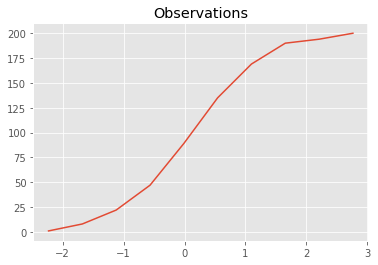

In [5]:
plt.plot(x,y)
plt.title('Observations')
plt.show()

In [6]:
# randomly initialize weights
a, b, c, d = np.random.randn(4)
print('a = {:.2f}\nb = {:.2f}\nc = {:.2f}\nd = {:.2f}'.format(a,b,c,d))

a = 0.78
b = -0.12
c = 0.12
d = 3.32


In [7]:
# train the model by applying gradient descent
errors, coefs = [], []
for i in range(max_iter): # epoch
    G_a, G_b, G_c, G_d = 0, 0, 0, 0
    for j in range(x.shape[0]):
        pred = predictor(x[j],a,b,c,d)
        
        g_a = dfda(x[j],y[j],pred)
        G_a = G_a + g_a**2
        a = a + (learning_rate / np.sqrt(G_a + eps)) * g_a
        
        g_b = dfdb(x[j],y[j],pred)
        G_b = G_b + g_b**2
        b = b + (learning_rate / np.sqrt(G_b + eps)) * g_b
        
        g_c = dfdc(x[j],y[j],pred)
        G_c = G_c + g_c**2
        c = c + (learning_rate / np.sqrt(G_c + eps)) * g_c
        
        g_d = dfdd(y[j],pred)
        G_d = G_d + g_d**2
        d = d + (learning_rate / np.sqrt(G_d + eps)) * g_d
        
    error = np.mean(np.abs(y-predictor(x,a,b,c,d)))
    if i % 10 == 0:
        print('MAE = {:.2f}'.format(error))
        #print('{:.2f}|{:.2f}|{:.2f}|{:.2f}'.format(G_a,G_b,G_c,G_d))
    errors.append(error)
    coefs.append((a,b,c,d))

MAE = 100.73
MAE = 99.28
MAE = 97.82
MAE = 96.35
MAE = 94.86
MAE = 93.36
MAE = 91.84
MAE = 90.31
MAE = 88.88
MAE = 87.48
MAE = 86.05
MAE = 84.63
MAE = 83.22
MAE = 81.81
MAE = 80.41
MAE = 79.00
MAE = 77.62
MAE = 76.30
MAE = 74.98
MAE = 73.67
MAE = 72.36
MAE = 71.05
MAE = 69.76
MAE = 68.46
MAE = 67.18
MAE = 65.91
MAE = 64.65
MAE = 63.41
MAE = 62.19
MAE = 60.99
MAE = 59.81
MAE = 58.66
MAE = 57.54
MAE = 56.97
MAE = 56.84
MAE = 56.71
MAE = 56.58
MAE = 56.45
MAE = 56.32
MAE = 56.19
MAE = 56.07
MAE = 55.94
MAE = 55.82
MAE = 55.70
MAE = 55.58
MAE = 55.47
MAE = 55.35
MAE = 55.24
MAE = 55.13
MAE = 55.02
MAE = 54.91
MAE = 54.81
MAE = 54.70
MAE = 54.60
MAE = 54.50
MAE = 54.40
MAE = 54.30
MAE = 54.20
MAE = 54.10
MAE = 54.01
MAE = 53.91
MAE = 53.82
MAE = 53.72
MAE = 53.65
MAE = 53.59
MAE = 53.53
MAE = 53.47
MAE = 53.41
MAE = 53.35
MAE = 53.29
MAE = 53.23
MAE = 53.17
MAE = 53.11
MAE = 53.12
MAE = 53.29
MAE = 53.46
MAE = 53.61
MAE = 53.77
MAE = 53.92
MAE = 54.06
MAE = 54.20
MAE = 54.34
MAE = 54.47
MAE

In [8]:
# parameters
print('a = {:.2f}\nb = {:.2f}\nc = {:.2f}\nd = {:.2f}'.format(a,b,c,d))

a = 8.81
b = 17.21
c = 6.36
d = 25.01


In [9]:
errors = np.asarray(errors)
coefs = np.asarray(coefs)

In [10]:
pred = predictor(x,a,b,c,d)

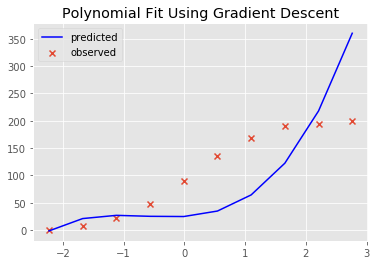

In [11]:
plt.scatter(x,y,label='observed',marker='x')
plt.plot(x,pred,label='predicted',c='blue')
plt.legend()
plt.title('Polynomial Fit Using Gradient Descent')
plt.show()

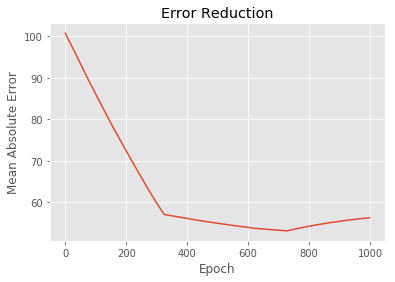

In [12]:
plt.plot(errors)
plt.title('Error Reduction')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.show()

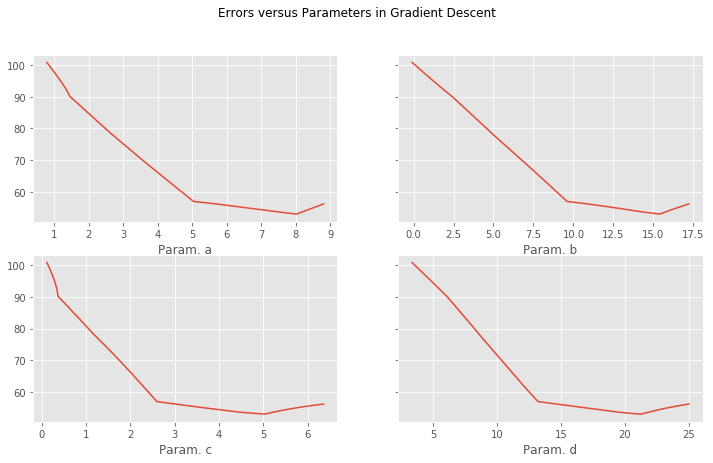

In [13]:
fig, axs = plt.subplots(2, 2,figsize=(12,6.75),sharey=True)
fig.suptitle('Errors versus Parameters in Gradient Descent')
axs[0,0].plot(coefs[:,0],errors)
axs[0,0].set_xlabel('Param. a')
axs[0,1].plot(coefs[:,1],errors)
axs[0,1].set_xlabel('Param. b')
axs[1,0].plot(coefs[:,2],errors)
axs[1,0].set_xlabel('Param. c')
axs[1,1].plot(coefs[:,3],errors)
axs[1,1].set_xlabel('Param. d')
plt.show()

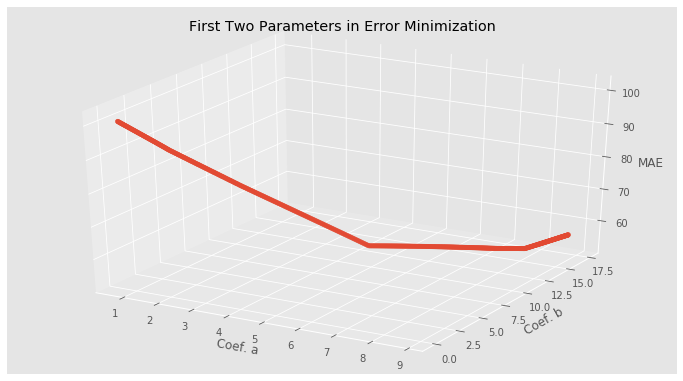

In [14]:
# error reduction path in three dimensions
fig = plt.figure(figsize=(12,6.75))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coefs[:,0], coefs[:,1], errors)
plt.title('First Two Parameters in Error Minimization')
ax.set_xlabel('Coef. a')
ax.set_ylabel('Coef. b')
ax.set_zlabel('MAE')
plt.show()

In [15]:
# contour limits
m = 4
n_res = 300
XX, YY = np.meshgrid(np.linspace(-m*a if -m*a < np.min(coefs[:,0])*2 else np.min(coefs[:,0])*2,
                                 m*a if m*a > np.max(coefs[:,0])*2 else np.max(coefs[:,0])*2, n_res),
                     np.linspace(-m*b if -m*b < np.min(coefs[:,1])*2 else np.min(coefs[:,1])*2,
                                 m*b if m*b > np.max(coefs[:,1])*2 else np.max(coefs[:,1])*2, n_res))
Z = np.asarray([f(y,predictor(x,aa,bb,c,d)) for aa,bb in zip(XX.ravel(), YY.ravel())])
Z = Z.reshape((n_res,n_res))

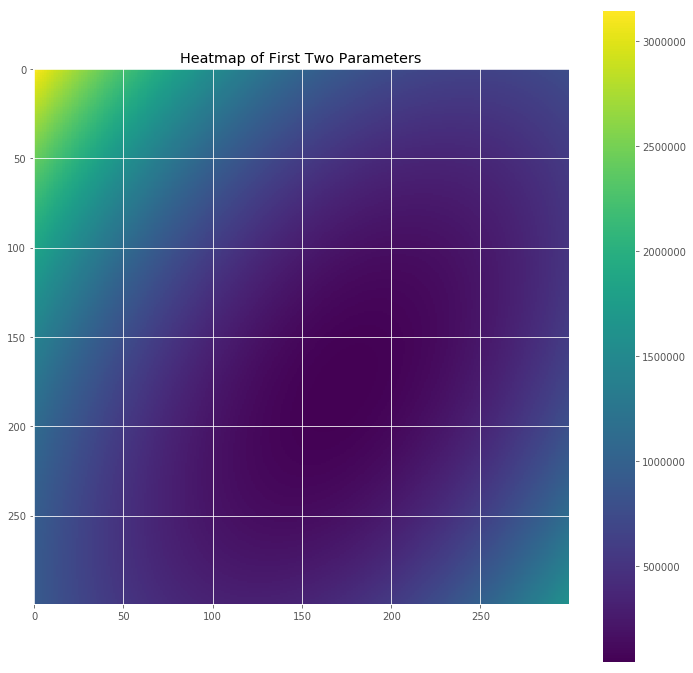

In [16]:
# Colorcode shows the error
fig = plt.figure(figsize=(12,12))
plt.imshow(Z, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of First Two Parameters')
plt.show()

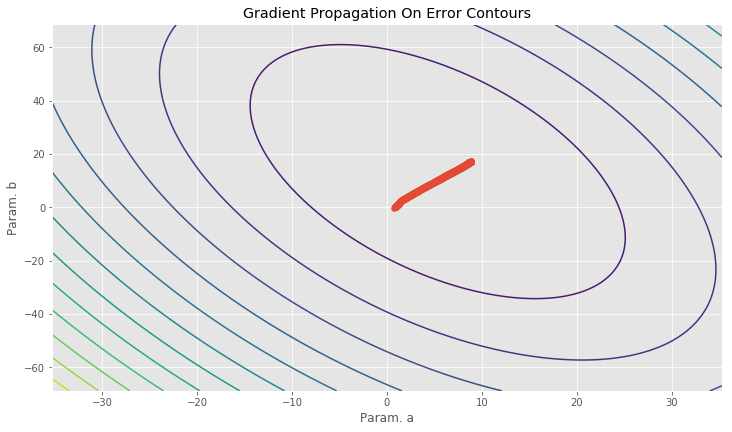

In [17]:
# contour plot parameters
fig = plt.figure(figsize=(12,6.75))
plt.contour(XX, YY, Z,levels=12)
plt.scatter(coefs[:, 0], coefs[:, 1])
plt.title('Gradient Propagation On Error Contours')
plt.xlabel('Param. a')
plt.ylabel('Param. b')
plt.show()

# References

https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827